<a href="https://colab.research.google.com/github/MemoryMaker1412/PanCard-Fraud-Detection/blob/main/PanCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Adding Import Statements
from skimage.metrics import structural_similarity as ssim
import imutils
import cv2
from PIL import Image
import requests

In [2]:
#Creating Directories to store Images
!mkdir pan_card
!mkdir pan_card/image

In [4]:
#Create Variables to Load Images
OriginalImg = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream=True).raw)
TestImg = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

In [6]:
#Checking Image Properties
print("Original Image Format",OriginalImg.format)
print("Original Image Size",OriginalImg.size)
print("Original Image Mode",OriginalImg.mode)

print("Test Image Format",TestImg.format)
print("Test Image Size",TestImg.size)
print("Test Image Mode",TestImg.mode)

Original Image Format JPEG
Original Image Size (1200, 800)
Original Image Mode RGB
Test Image Format PNG
Test Image Size (282, 179)
Test Image Mode RGBA


In [7]:
#Resizing the images
Original = OriginalImg.resize((250,160))
print("Original Image Size",Original.size)
Original.save("pan_card/image/Original.png")
Test = TestImg.resize((250,160))
print("Test Image Size",Test.size)
Test.save("pan_card/image/Test.png")

Original Image Size (250, 160)
Test Image Size (250, 160)


In [8]:
#Loading Images
Original = cv2.imread("pan_card/image/Original.png")
Test = cv2.imread("pan_card/image/Test.png")

In [9]:
#Converting Image to Grayscale
Original_gray = cv2.cvtColor(Original, cv2.COLOR_BGR2GRAY)
Test_gray = cv2.cvtColor(Test, cv2.COLOR_BGR2GRAY)

In [10]:
#To compute structural similarity
(score, diff) = ssim(Original_gray, Test_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


In [11]:
#Find threshold and contours of the image
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [14]:
#Create a rectange using contours
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(Original, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.rectangle(Test, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Image Format


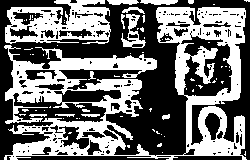

In [17]:
print("Original Image Format")
Image.fromarray(thresh)